In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

### 1 dataset

In [ ]:
# download
!wget https://www.dropbox.com/s/3j76hc0q63it4iu/dataset.zip
!unzip dataset.zip

Found 940 images belonging to 5 classes.
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
{'JUICE': 0, 'MILK': 1, 'SODA': 2, 'VINEGAR': 3, 'WATER': 4}
banyak batch: 30
apa itu imgs <class 'numpy.ndarray'>
dimensi imgs dengan batch: (32, 256, 256, 3)
dimensi gambar: (256, 256, 3)
contoh gambar (channel R)
[[0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]
 [0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]
 [0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]
 ...
 [0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]
 [0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]
 [0.5019608 0.5019608 0.5019608 ... 0.5019608 0.5019608 0.5019608]]
contoh label
[0. 0. 0. 0. 1.]
contoh gambar visualnya


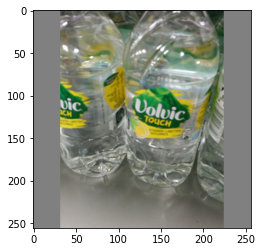

In [ ]:
# preprocess
datagen = ImageDataGenerator(rescale=1/255.)

datatrain = DirectoryIterator('train', datagen)
print(type(datatrain))
print(datatrain.class_indices)
print("banyak batch:", len(datatrain))

for imgs, labels in datatrain:
    print("apa itu imgs", type(imgs))
    print("dimensi imgs dengan batch:", imgs.shape)
    print("dimensi gambar:", imgs[0].shape)
    print("contoh gambar (channel R)")
    print(imgs[0,:,:,0])
    print("contoh label")
    print(labels[0])

    print("contoh gambar visualnya")
    plt.imshow( imgs[0] )
    break

### 2 buat model

In [ ]:
model = Sequential([
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(5, activation='softmax')
])

#choose optimizer and loss function
model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.001),
                metrics=['accuracy'])

In [ ]:
model.build((None, 256, 256, 3))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 258064)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16516160  
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 16,516,933
Trainable params: 16,516,933
Non-trainable params: 0
_________________________________________________________________
None


### 3 train

In [ ]:
model.fit(datatrain, batch_size=16, epochs=20, verbose=1)

Epoch 1/20
30/30 [==============================] - 4s 128ms/step - loss: 1.5706 - accuracy: 0.2656
Epoch 2/20
30/30 [==============================] - 4s 126ms/step - loss: 1.5134 - accuracy: 0.3025
Epoch 3/20
30/30 [==============================] - 4s 127ms/step - loss: 1.4627 - accuracy: 0.3798
Epoch 4/20
30/30 [==============================] - 4s 129ms/step - loss: 1.4294 - accuracy: 0.4398
Epoch 5/20
30/30 [==============================] - 4s 128ms/step - loss: 1.3818 - accuracy: 0.4946
Epoch 6/20
30/30 [==============================] - 4s 131ms/step - loss: 1.3627 - accuracy: 0.5210
Epoch 7/20
30/30 [==============================] - 4s 126ms/step - loss: 1.3248 - accuracy: 0.5950
Epoch 8/20
30/30 [==============================] - 4s 126ms/step - loss: 1.2992 - accuracy: 0.5846
Epoch 9/20
30/30 [==============================] - 4s 127ms/step - loss: 1.2892 - accuracy: 0.5807
Epoch 10/20
30/30 [==============================] - 4s 128ms/step - loss: 1.2393 - accuracy: 0.5953

### 4 test

In [ ]:
test_loss, test_acc = model.evaluate(datatest, verbose=1)

4/4 [==============================] - 1s 114ms/step - loss: 1.1966 - accuracy: 0.5667
